In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.8         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 1000).T

In [5]:
df = pd.DataFrame()

In [6]:
df['exp(in months)'] = m[0]
df['salary(in thousandas)'] = m[1]

In [7]:
df.head()

,exp(in months),salary(in thousandas)
0,22.609863,27.668179
1,27.620966,26.176519
2,19.170910,28.221108
3,28.611417,24.011775
4,18.580560,19.331459


In [8]:
df.shape

(1000, 2)

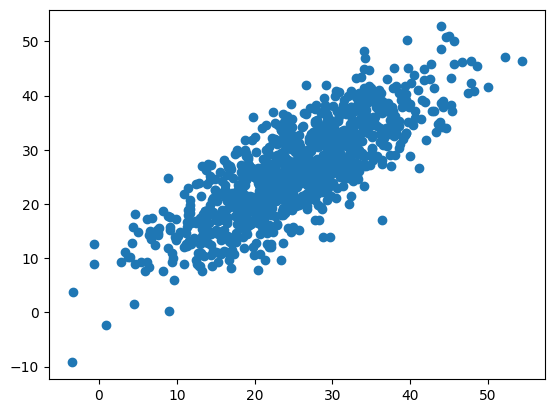

In [9]:
plt.scatter(df['exp(in months)'],df['salary(in thousandas)'])

In [10]:
X = df.iloc[:,0:1].values
y = df.iloc[:,1].values

In [11]:
print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [15]:
print(X_train.shape)
print(X_test.shape)

(800, 1)
(200, 1)


In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [17]:
regressor.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred = regressor.predict(X_test)

In [19]:
# Finding the Coefs and intercept

# Equation of line is given by y=mx+b
# y=0.79*x + 6.20
# m ---> slope
# b ---> intercept

# X coefficient
print(regressor.coef_[0])

# Y intercept
print(regressor.intercept_)

0.790850281601027
6.202680101430012


In [25]:
y_pred.shape

(200,)

In [26]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

4.107558880643559

In [27]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

25.954601513190056

In [28]:
# Root Mean Squared Error
mse=mean_squared_error(y_test,y_pred)

np.sqrt(mse)

5.094565880739011

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6740459367227171

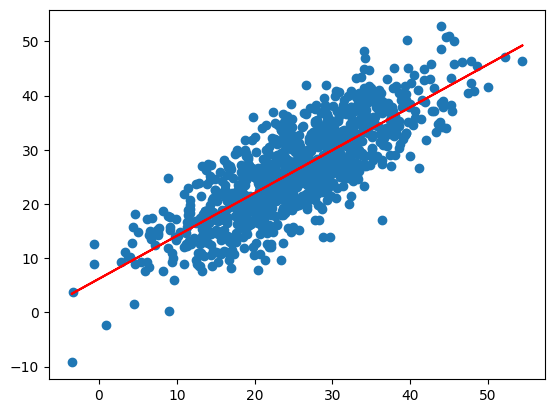

In [30]:
# Visualizing the Regression Line
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.scatter(df['exp(in months)'],df['salary(in thousandas)'])